In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_excel('Parkinsondata.xlsx', index_col='name')
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, phon_R01_S01_1 to phon_R01_S50_6
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non

In [ ]:
data.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
print(data.columns)

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [ ]:
corr_matrix = data.corr()

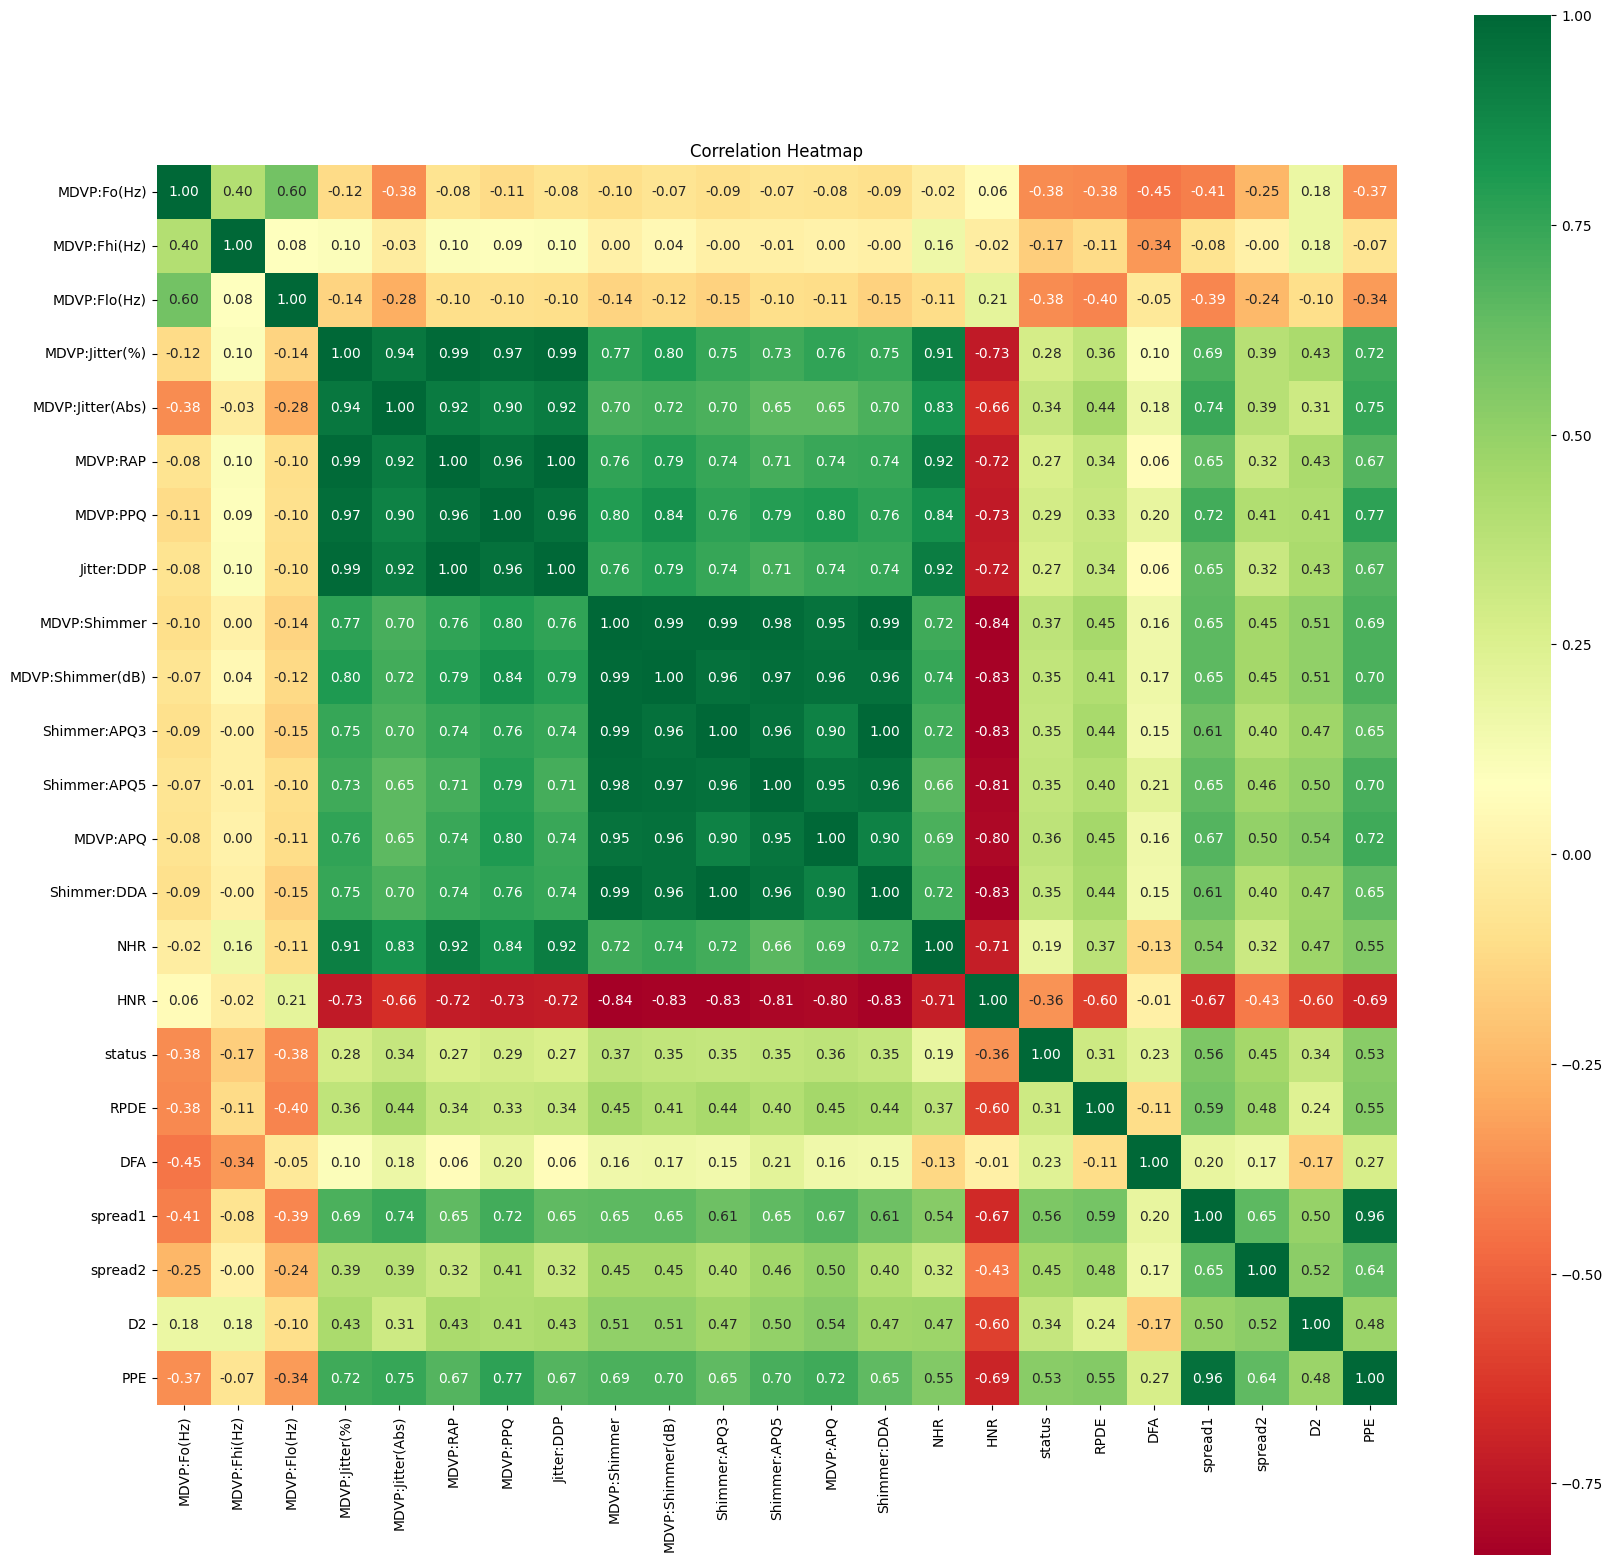

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

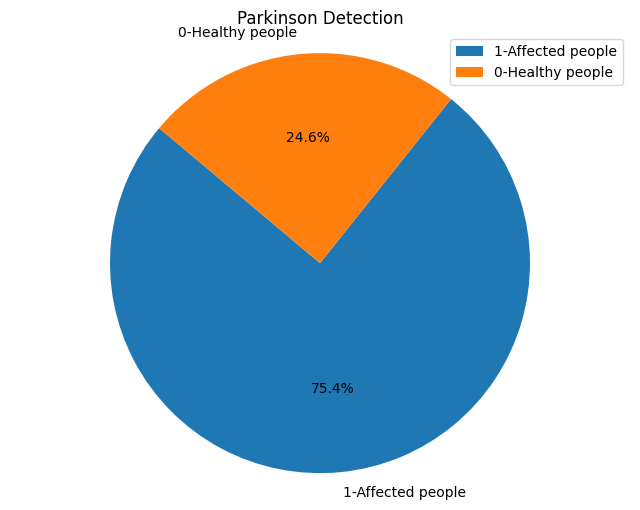

In [ ]:
status_counts = data['status'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index.map({0: '0-Healthy people', 1: '1-Affected people'}), autopct='%1.1f%%', startangle=140)
plt.title('Parkinson Detection')
plt.axis('equal')
plt.legend()
plt.show()

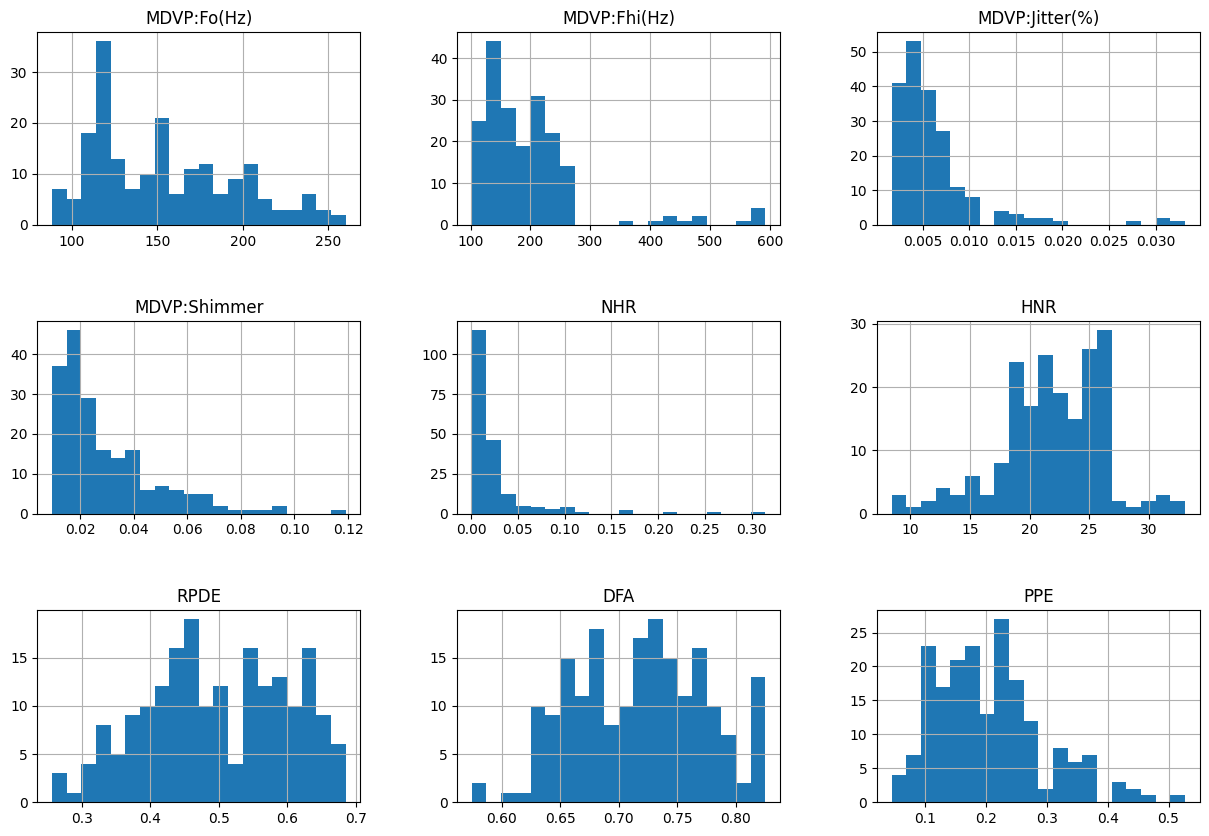

In [ ]:
data.hist(column=["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Jitter(%)","MDVP:Shimmer","NHR","HNR","RPDE","DFA","PPE"],
          layout=(3, 3), figsize=(15, 10), bins=20)
plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
df_no_multicolin = data.drop(columns = ['MDVP:Jitter(%)','MDVP:Jitter(Abs)',
                                      'MDVP:RAP', 'MDVP:PPQ', 'MDVP:Shimmer', 'Shimmer:APQ3',
                                      'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA', 'Jitter:DDP'])

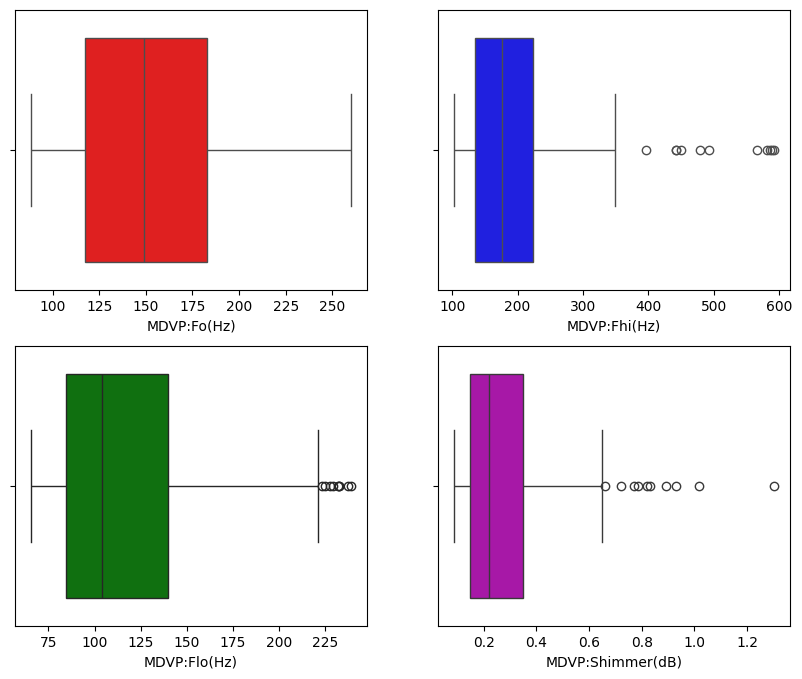

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
sns.boxplot(data = df_no_multicolin, x = 'MDVP:Fo(Hz)', ax = ax1, color = 'r')
sns.boxplot(data = df_no_multicolin, x = 'MDVP:Fhi(Hz)', ax = ax2, color = 'b')
sns.boxplot(data = df_no_multicolin, x = 'MDVP:Flo(Hz)', ax = ax3, color = 'g')
sns.boxplot(data = df_no_multicolin, x = 'MDVP:Shimmer(dB)', ax = ax4, color = 'm')
plt.show()

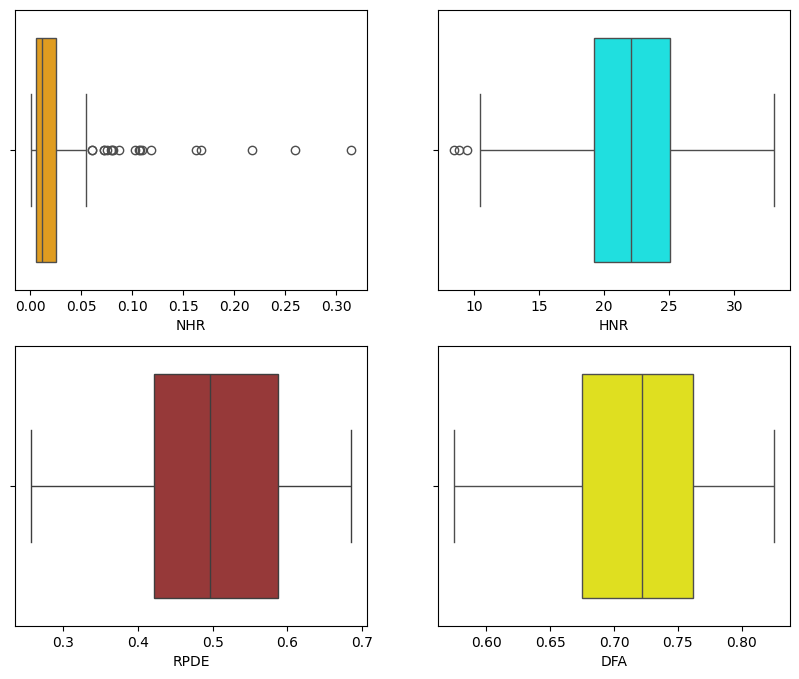

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
sns.boxplot(data = df_no_multicolin, x = 'NHR', ax = ax1, color = 'orange')
sns.boxplot(data = df_no_multicolin, x = 'HNR', ax = ax2, color = 'cyan')
sns.boxplot(data = df_no_multicolin, x = 'RPDE', ax = ax3, color = 'brown')
sns.boxplot(data = df_no_multicolin, x = 'DFA', ax = ax4, color = 'yellow')
plt.show()

<Figure size 1200x800 with 0 Axes>

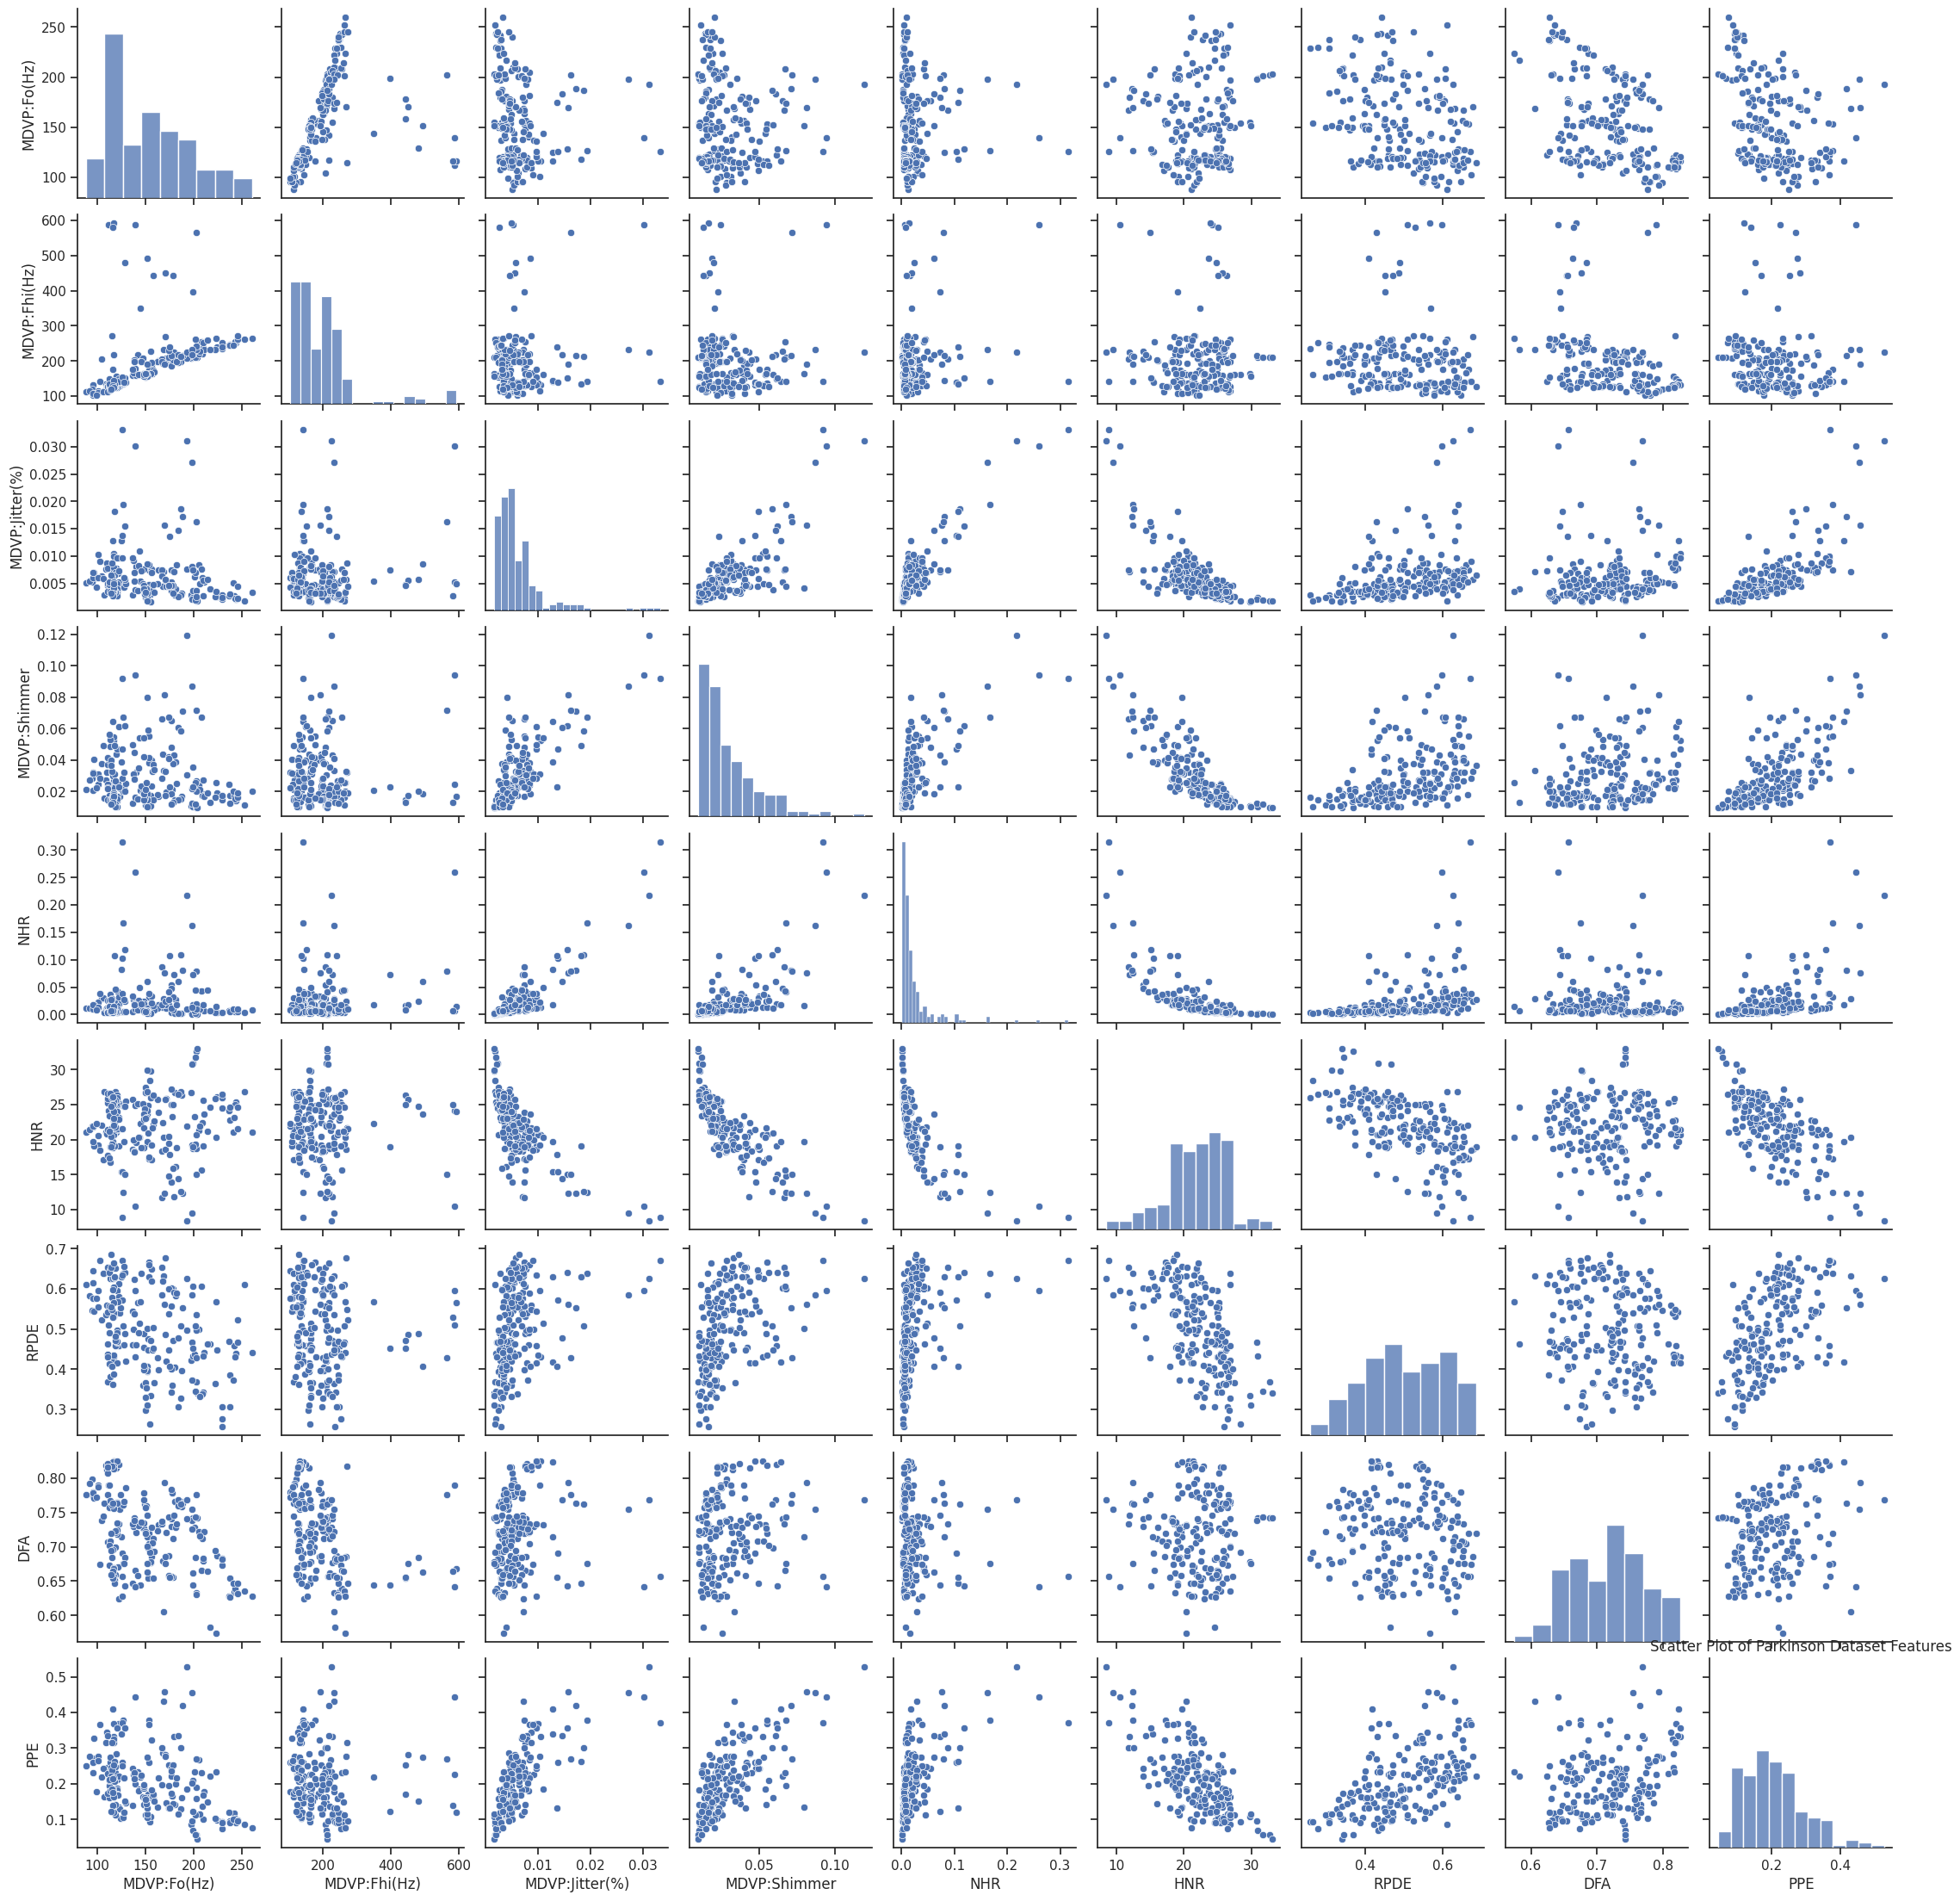

In [ ]:
selected_features = ["MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Jitter(%)", "MDVP:Shimmer", "NHR", "HNR", "RPDE", "DFA", "PPE"]
plt.figure(figsize=(12, 8))
sns.set(style="ticks")
sns.pairplot(data, vars=selected_features)
plt.title('Scatter Plot of Parkinson Dataset Features')
plt.show()

In [ ]:
features = ['MDVP:Jitter(%)', 'MDVP:Shimmer', 'NHR']
z_scores = np.abs((data['MDVP:Jitter(%)'] - data['MDVP:Shimmer'].mean()) / data['NHR'].std())
threshold = 0.5
outliers = z_scores > threshold
print(data[outliers])

                MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
name                                                                      
phon_R01_S01_1      119.992       157.302        74.997         0.00784   
phon_R01_S02_1      120.267       137.244       114.820         0.00333   
phon_R01_S02_2      107.332       113.840       104.315         0.00290   
phon_R01_S02_3       95.730       132.068        91.754         0.00551   
phon_R01_S02_4       95.056       120.103        91.226         0.00532   
...                     ...           ...           ...             ...   
phon_R01_S50_1      201.774       262.707        78.228         0.00694   
phon_R01_S50_2      174.188       230.978        94.261         0.00459   
phon_R01_S50_3      209.516       253.017        89.488         0.00564   
phon_R01_S50_5      198.764       396.961        74.904         0.00740   
phon_R01_S50_6      214.289       260.277        77.973         0.00567   

                MDVP:Jit

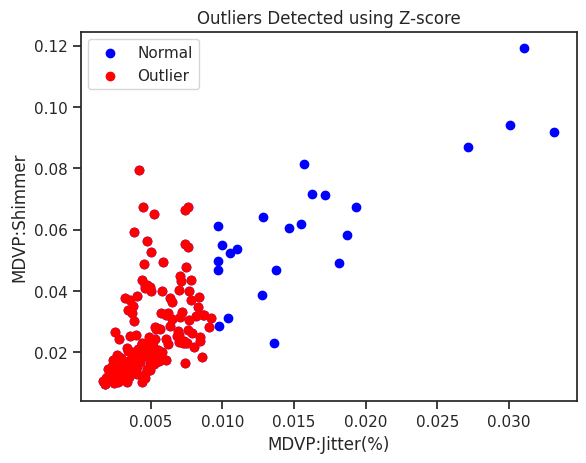

In [ ]:
plt.scatter(data['MDVP:Jitter(%)'], data['MDVP:Shimmer'], c='blue', label='Normal')
plt.scatter(data['MDVP:Jitter(%)'][outliers], data['MDVP:Shimmer'][outliers], c='red', label='Outlier')
plt.xlabel('MDVP:Jitter(%)')
plt.ylabel('MDVP:Shimmer')
plt.title('Outliers Detected using Z-score')
plt.legend()
plt.show()

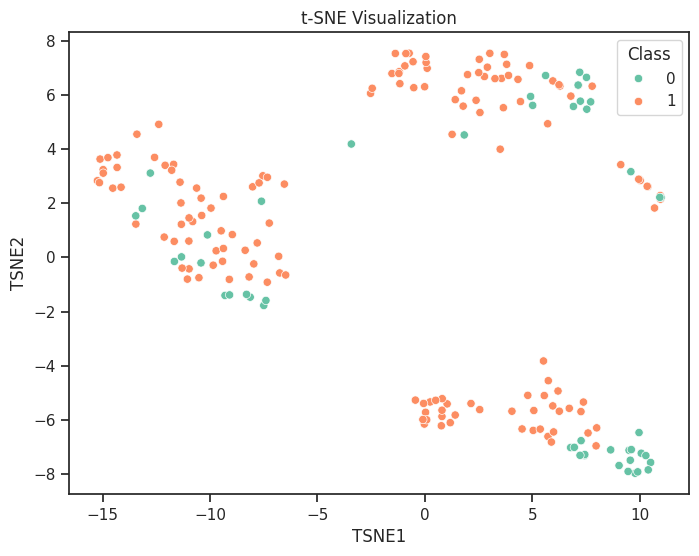

In [ ]:
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y.values
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2')
plt.title('t-SNE Visualization')
plt.show()

In [ ]:
X = data.drop('status', axis=1)
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
y=data['status']
y.head()

name
phon_R01_S01_1    1
phon_R01_S01_2    1
phon_R01_S01_3    1
phon_R01_S01_4    1
phon_R01_S01_5    1
Name: status, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Accuracy: 93.22%
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59



Text(66.24999999999999, 0.5, 'True')

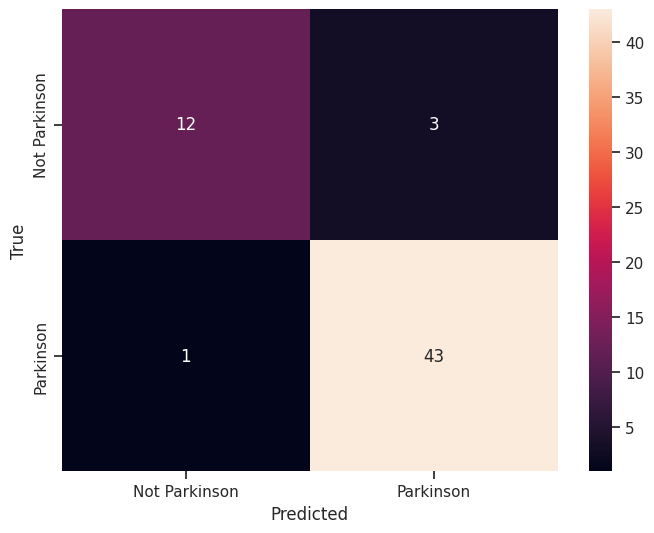

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred))
confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", xticklabels=["Not Parkinson", "Parkinson"], yticklabels=["Not Parkinson", "Parkinson"])
plt.xlabel("Predicted")
plt.ylabel("True")


Accuracy: 92.31%
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



Text(66.24999999999999, 0.5, 'True')

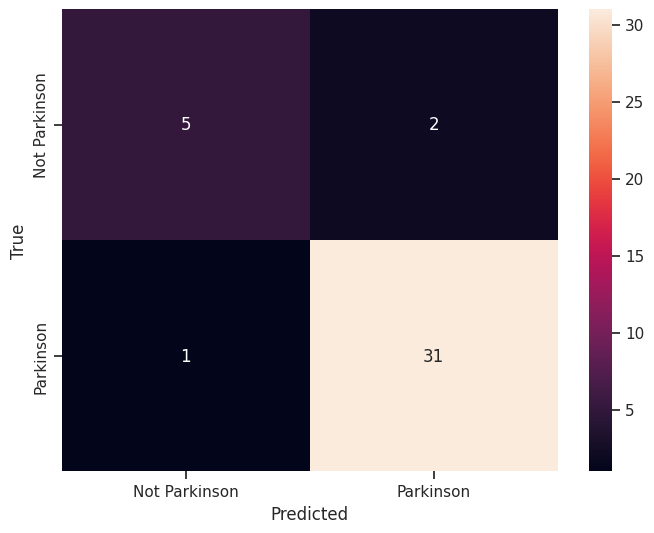

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred))
confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", xticklabels=["Not Parkinson", "Parkinson"], yticklabels=["Not Parkinson", "Parkinson"])
plt.xlabel("Predicted")
plt.ylabel("True")

Accuracy: 89.74%
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



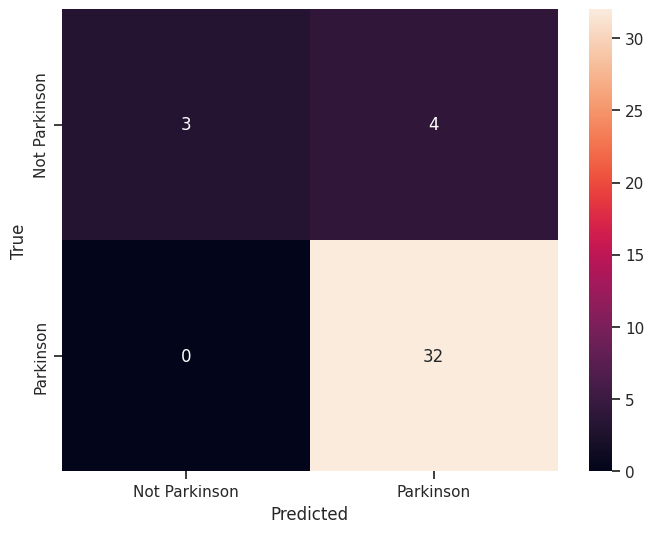

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=["Not Parkinson", "Parkinson"], yticklabels=["Not Parkinson", "Parkinson"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
import pickle
trained_model = clf
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(trained_model, f)

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.4 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl siz

In [ ]:
!pip install librosa soundfile

In [ ]:
import gradio as gr
import cloudpickle as cp
import numpy as np
import librosa
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

with open('rf_model.pkl', 'rb') as model_file:
    rf = cp.load(model_file)

feature_names = [
    'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ',
    'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR',
    'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

def predict_parkinsons(file_path):
    try:
        audio, sr = librosa.load(file_path, sr=44100)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=22)
        mfccs_mean = np.mean(mfccs, axis=1)
        # Make prediction probabilities
        prediction_probs = rf.predict_proba([mfccs_mean])[0]
        # Extract the probability of the positive class (indicating Parkinson's disease)
        disease_probability = prediction_probs[1] * 100
        # Create a string containing the prediction result and the disease probability
        result = f'Parkinson\'s Disease Prediction: {rf.predict([mfccs_mean])[0]}\n\nDisease Probability: {disease_probability:.2f}%'
        return result
    except Exception as e:
        return f'Error during prediction: {str(e)}'

iface = gr.Interface(
    fn=predict_parkinsons,
    inputs=gr.File(label="Upload audio file"),
    outputs=gr.Textbox(label="Prediction Result"),
    live=True
)

iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://99d97d7725c7ec498e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
